In [1]:
# Apply machine learning to temperature data
# Predict how temperatures will change in the future

# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
temperature_data = pd.read_csv("clean_data/NASA_temp.csv")
temp_data = pd.DataFrame(temperature_data)
temp_data.head()

,Unnamed: 0,Year,No_Smoothing,Lowess(5)
0,0,1965,-0.11,-0.05
1,1,1966,-0.06,-0.06
2,2,1967,-0.02,-0.05
3,3,1968,-0.08,-0.03
4,4,1969,0.05,-0.02


In [6]:
temp = temp_data.drop(columns="Unnamed: 0")
temp.head()

,Year,No_Smoothing,Lowess(5)
0,1965,-0.11,-0.05
1,1966,-0.06,-0.06
2,1967,-0.02,-0.05
3,1968,-0.08,-0.03
4,1969,0.05,-0.02


In [10]:
X = temp.Year.values.reshape(-1, 1)
y = temp.No_Smoothing.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (56, 1) (56, 1)


array([[1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020]], dtype=int64)

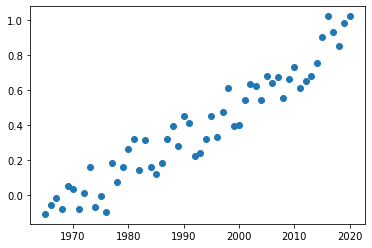

In [11]:
plt.scatter(X, y)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [13]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [14]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.01863397]]
y-axis intercept:  [-36.74336637]


In [15]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1965]]
Max X Value: [[2020]]


In [16]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

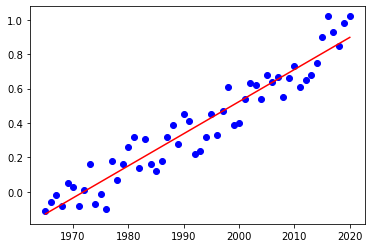

In [17]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [18]:
# Predict anual temperature change in 2030
y_2030 = model.predict([[2030]])
y_2030

array([[1.08359535]])

In [22]:
y_2040 = model.predict([[2040]])
y_2040

array([[1.26993506]])